In [1]:
!pip install PyMuPDF Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.9 MB/s eta 0:00:00


In [6]:
import numpy as np
import io
from PIL import Image
import fitz
import matplotlib.pyplot as plt

In [12]:
# file path you want to extract images from
file = "/content/File.pdf"
# open the file
pdf_file = fitz.open(file)
# iterate over PDF pages
for page_index in range(len(pdf_file)):
    # get the page itself
    page = pdf_file[page_index]
    image_list = page.get_images()
    # printing number of images found in each page
    if image_list:
        print(f"[+] Found a total of {len(image_list)} images in page {page_index}")
    else:
        print("[!] No images found on page", page_index)

[!] No images found on page 0
[!] No images found on page 1
[+] Found a total of 59 images in page 2
[!] No images found on page 3
[!] No images found on page 4
[!] No images found on page 5


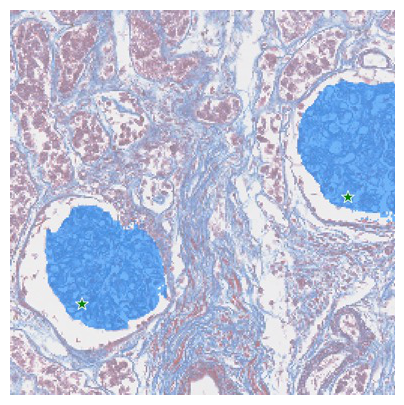

In [13]:
page = pdf_file[2]
imges=[]
for image_index, img in enumerate(page.get_images(), start=1):
    ref = img[0]
    # extract the image bytes
    base_image = pdf_file.extract_image(ref)
    image_bytes = base_image["image"]
    # get the image extension
    #image_ext = base_image["ext"]
    # create a PIL Image object from the image bytes
    image = Image.open(io.BytesIO(image_bytes))
    image_array = np.array(image)
    imges.append(image_array)
plt.figure(figsize=(5,5))
plt.imshow(imges[7])
plt.axis('off')
plt.show()